## Importing libraries

In [176]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, accuracy_score, auc
import pickle
%matplotlib inline

## Load and Prepare Data

In [177]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [178]:
data = pd.read_csv('/content/drive/MyDrive/Project 2 - Churn modelling/Churn.csv')

## EDA

In [179]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [180]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


So there is no NaN values.

## Data Preprocessing

In [182]:
# dropping useless columns 

data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [183]:
# Encoding categorical variables

data['Geography'] = data['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})

## Storytelling - Visualization

<span style="color:#329ca8">ratio of Active to not Active, Exited to not exited, Credit card owners to non credit card owners, Female to men</span>

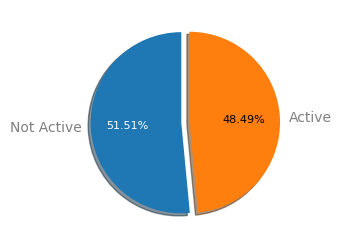

In [184]:
values = data.IsActiveMember.value_counts()
labels = ['Not Active', 'Active']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

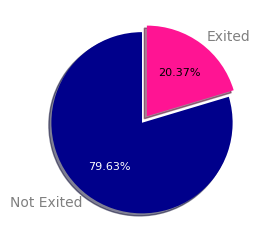

In [185]:
values = data.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode, colors = ['darkblue','deeppink'])

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

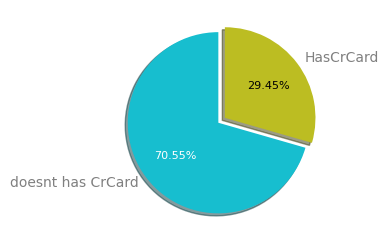

In [186]:
values = data.HasCrCard.value_counts()
labels = ['doesnt has CrCard', 'HasCrCard']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode, colors = ['tab:cyan' , 'tab:olive'])

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

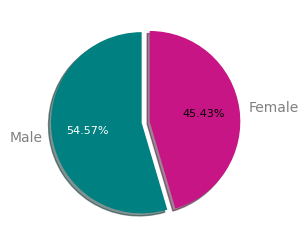

In [187]:
values = data.Gender.value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode, colors = ['teal','mediumvioletred'])

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [188]:
data.Geography.unique()

array([0, 2, 1])

<span style="color:#329ca8">comparing each feature in terms of number of people</span>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

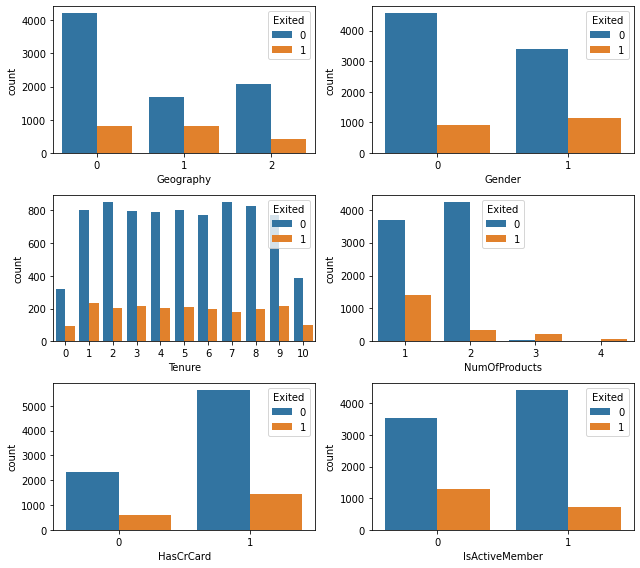

In [189]:
fig, ax = plt.subplots(3, 2, figsize = (9, 8))

sns.countplot('Geography', hue = 'Exited', data = data, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = data, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = data, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = data, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = data, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = data, ax = ax[2][1])

plt.tight_layout()
plt.show()

In [190]:
fig = px.violin(data, y= 'Age', color='Gender')
fig.update_layout(width=800, height=500)
fig.show()

In [191]:
fig = px.violin(data, x="Geography", y="EstimatedSalary", color = 'Gender', violinmode='overlay', hover_data=data.columns)
fig.update_layout(width=800, height=500)
fig.show()

conclusions:
1. Number of French customers is more than german and spanish. Number of spanish customers is in the middle but they exited the least. Maybe they have the most satisfaction and products meet their needs more.
2. Number of female customers is less but also they have more number of exited. Maybe they are hardly satisfied.
3. With the rise in tenures, number of exits rises.
4. Number of exited customers that baught more products is more. One probablity of this would be dissatisfaction.
5. this can be a coincidence, but the probablity of exit increases, when someone has credit card.
6. When a customer is active, she/he hardly exits.
7. Most Costumers are in their 30s.
8. It seems that estimated salary for both women and men in France, Spain and Germany is the same.

<span style="color:#329ca8">finding effective features on Exited and correlated features</span>

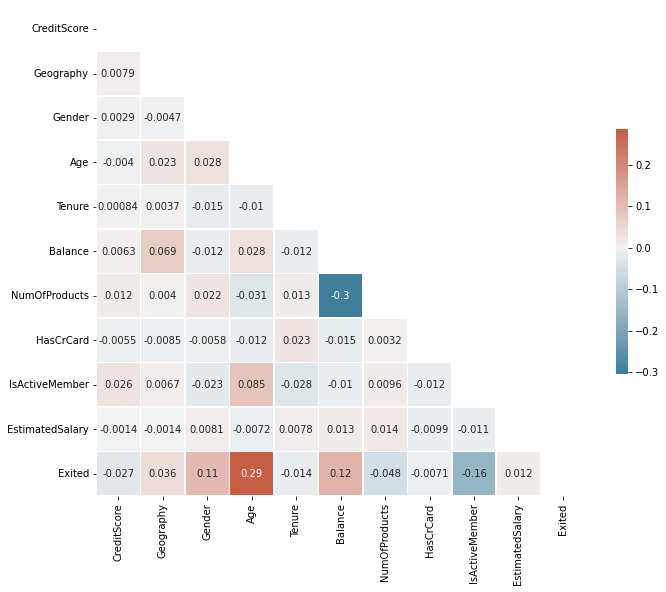

In [192]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [193]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

<span style="color:#329ca8">finding the age distribution of customers</span>

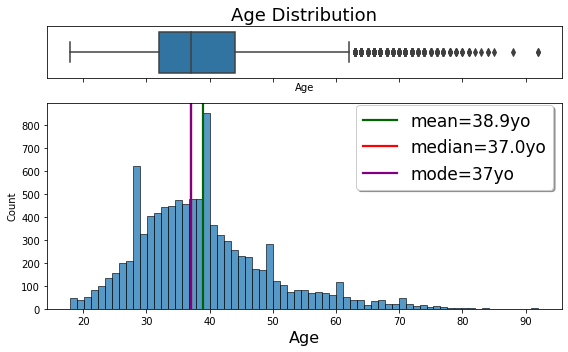

In [194]:
num_plot(data, 'Age', 'Age Distribution' , 'yo' )

## Prepare Data for Machine learning

In [195]:
X = pd.DataFrame(data.iloc[:, :-1].values)
y = data.iloc[:, -1].values

In [196]:
# dropping data with less effect

X.drop(9, inplace = True, axis = 1)  # Estimated Salary
X.drop(7, inplace = True, axis = 1)  # HasCrCard
X.drop(4, inplace = True, axis = 1)  # Tenure

In [197]:
# spliting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [198]:
# scaling data

sc = StandardScaler()

x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

## Training model

In [199]:
# training with adaboost classifier

ada = AdaBoostClassifier(learning_rate = 0.25 , n_estimators = 1200 , random_state = 1)
ada.fit(x_train, y_train)
pred_ada_train = ada.predict(x_train)
pred_ada_test = ada.predict(x_test)

ada_acc_train = metrics.accuracy_score(y_train, pred_ada_train) 
ada_acc_test = metrics.accuracy_score(y_test, pred_ada_test) 
ada_pr_train = metrics.precision_score(y_train, pred_ada_train, average = None)[0]
ada_pr_test = metrics.precision_score(y_test, pred_ada_test, average = None)[0]

In [200]:
# training with logistic regression

lr_org = LogisticRegression()
lr_org.fit(x_train , y_train)
pred_lr_org_train = lr_org.predict(x_train)
pred_lr_org_test = lr_org.predict(x_test)

lr_org_acc_train = metrics.accuracy_score(y_train, pred_lr_org_train)
lr_org_acc_test = metrics.accuracy_score(y_test, pred_lr_org_test)

## Testing the model and showing the metrics

In [201]:
print("Adaboost classifier accuracy(train):", np.round(ada_acc_train, 3))
print("Adaboost classifier precision(train):", np.round(ada_pr_train, 3))
print("Adaboost classifier accuracy(test):", np.round(ada_acc_test, 3))
print("Adaboost classifier precision(test):", np.round(ada_pr_test, 3))

Adaboost classifier accuracy(train): 0.861
Adaboost classifier precision(train): 0.876
Adaboost classifier accuracy(test): 0.854
Adaboost classifier precision(test): 0.868


In [202]:
print("Logistic regression accuracy(train):", np.round(lr_org_acc_train, 3))
print("Logistic regression accuracy(test):", np.round(lr_org_acc_test, 3))

Logistic regression accuracy(train): 0.81
Logistic regression accuracy(test): 0.806


In [203]:
print("Adaboost classifier F1 score(train):", np.round(f1_score(y_train, pred_ada_train), 3))
print("logisticRegression F1 score(train):", np.round(f1_score(y_train, pred_lr_org_train), 3))
print("Adaboost classifier F1 score(test):", np.round(f1_score(y_test, pred_ada_test), 3))
print("logisticRegression F1 score(test):", np.round(f1_score(y_test, pred_lr_org_test), 3))

Adaboost classifier F1 score(train): 0.575
logisticRegression F1 score(train): 0.27
Adaboost classifier F1 score(test): 0.558
logisticRegression F1 score(test): 0.281


In [204]:
print("Adaboost classifier recall score(train):", np.round(recall_score(y_train, pred_ada_train), 3))
print("logisticRegression recall score(train):", np.round(recall_score(y_train, pred_lr_org_train), 3))
print("Adaboost recall classifier score(test):", np.round(recall_score(y_test, pred_ada_test), 3))
print("logisticRegression recall score(test):", np.round(recall_score(y_test, pred_lr_org_test), 3))

Adaboost classifier recall score(train): 0.464
logisticRegression recall score(train): 0.174
Adaboost recall classifier score(test): 0.443
logisticRegression recall score(test): 0.183


<span style="color:#329ca8">plotting ROC curve</span>

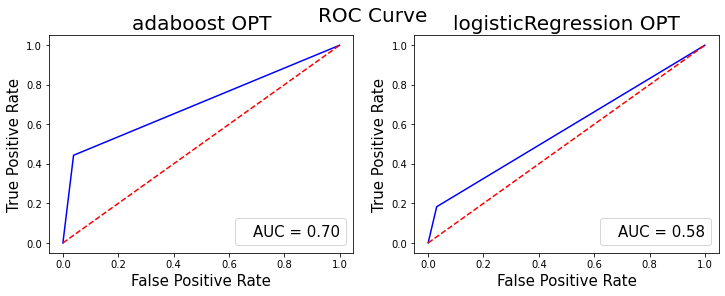

In [205]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

plt.suptitle('ROC Curve', fontsize=20)

fpr, tpr, _ = roc_curve(y_test, pred_ada_test)
roc_auc = auc(fpr, tpr)
ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_title('adaboost OPT',fontsize=20)
ax[0].set_ylabel('True Positive Rate',fontsize=15)
ax[0].set_xlabel('False Positive Rate',fontsize=15)
ax[0].legend(loc = 'lower right', prop={'size': 15},handlelength=0)

fpr, tpr, _ = roc_curve(y_test, pred_lr_org_test)
roc_auc = auc(fpr, tpr)
ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].set_title('logisticRegression OPT',fontsize=20)
ax[1].set_ylabel('True Positive Rate',fontsize=15)
ax[1].set_xlabel('False Positive Rate',fontsize=15)
ax[1].legend(loc = 'lower right', prop={'size': 15},handlelength=0)

<span style="color:#329ca8">plotting confusion matrix(for adaboost classifier)(first for train then test)</span>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



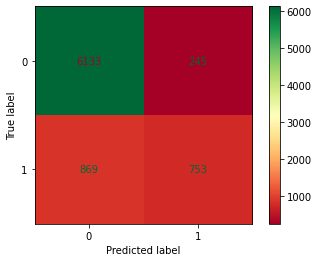

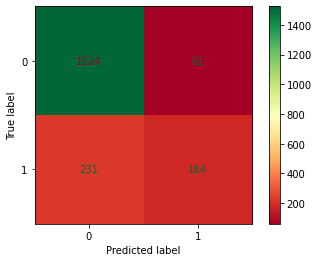

In [206]:
plot_confusion_matrix(ada, x_train, y_train, cmap = 'RdYlGn') 
plot_confusion_matrix(ada, x_test, y_test, cmap = 'RdYlGn')

plt.show()

<span style="color:#329ca8">plotting confusion matrix(for logistic regression)(first for train then test)</span>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



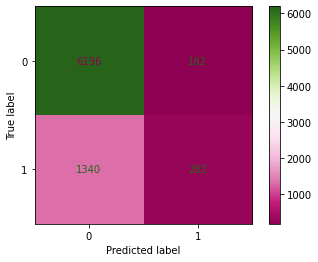

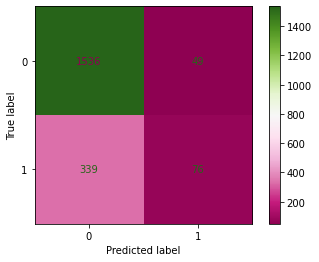

In [207]:
plot_confusion_matrix(lr_org, x_train, y_train, cmap = 'PiYG') 
plot_confusion_matrix(lr_org, x_test, y_test, cmap = 'PiYG')

plt.show()

So in general, from my previous calculations and the calculations and metrics hear, adaboost classifier makes the best prediction.

## Saving final model

In [208]:
filename = '/content/drive/MyDrive/Project 2 - Churn modelling/finalized_model.sav'
pickle.dump(ada, open(filename, 'wb'))